# Exploratory Data Analysis

#### Problem Statement:

What areas of DC are similar to each other across social, economic, housing, and demographic characteristics? 

* DC is rarely demographically/socially/economicaly explored or talked about at a hyper-local level. Some commercial products exist, but generalize the district using zip codes or larger units of analysis. ESRI’s Tapestry product is one of these. Because DC has no congressional representation, companies like Quorum rarely explore it to the same extent they explore, say, Ohio.
* Contemporary analysis typically observes only one or two variables at a time--maps of median income vs X demographic variable, maps displaying the ethnic segregation of DC, etc. Lately, we've seen maps of poverty vs COVID and ethnicity vs COVID. Such analysis can still be elucidating or useful, but with only bivariate comparisons, we’re left to infer the deeper sociodemographic nuances of our own neighborhoods. When it comes to policy, beliefs generated from anecdotal evidence will lead to systems-level bias and injustice. For example, some commentary refers to Anacostia in tones that are, at best, sweeping generalizations of geography and, at worst, racist. We see the same thing in NE, Columbia Heights, and other neighborhoods. 

This analysis will attempt to provide more nuance in describing DC at a granular level. Clustering characteristics across all 179 DC census tracts and a wide range of variables will reveal where areas of likenesses present themselves at a hyper-local level. Beyond dispelling preconceived notions and bias, understanding the granular makeup of the city at this level can help government, planners, social services, and businesses better and more fairly serve DC residents. This analysis will aim to offer insight into issues of gentrification, segregation, class and wealth dispersion in the city, among other topics. 

 

In [82]:
# Import Libraries:

import pandas as pd
import numpy as np

import geopandas as gpd
import descartes
#! pip install geoplot
#import geoplot

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import requests
from bs4 import BeautifulSoup

In [83]:
# Read CSV:

df = pd.read_csv('../data/tabular_data/ACS_2018_Median_Household_Income_Variables_Tract.csv')

In [84]:
# Observe the data:

df.head()

,OBJECTID,GEOID,ALAND,AWATER,NAME,State,County,B19049_001E,B19049_001M,B19049_002E,...,B19053_002E,B19053_002M,B19053_003E,B19053_003M,B19053_calc_pctSelfempE,B19053_calc_pctSelfempM,Shape__Area,Shape__Length,Shape__Area_2,Shape__Length_2
0,1,11001000100,1907610,512798,Census Tract 1,District of Columbia,District of Columbia,191146.0,25411.0,NaN,...,358,97,1993,197,15.2,3.946100,3.157970e+06,16275.593080,3.157970e+06,16275.593080
1,2,11001000201,503312,0,Census Tract 2.01,District of Columbia,District of Columbia,NaN,NaN,NaN,...,0,12,0,12,NaN,NaN,8.324142e+05,4265.956241,8.324142e+05,4265.956241
2,3,11001000202,776437,428754,Census Tract 2.02,District of Columbia,District of Columbia,170987.0,28290.0,NaN,...,313,125,1250,179,20.0,7.753475,1.284189e+06,13196.755430,1.284189e+06,13196.755430
3,4,11001000300,1010802,2334,Census Tract 3,District of Columbia,District of Columbia,152120.0,21528.0,36047.0,...,245,99,2210,149,10.0,4.007263,1.675991e+06,5244.314206,1.675991e+06,5244.314206
4,5,11001000400,1542759,69,Census Tract 4,District of Columbia,District of Columbia,126731.0,38147.0,NaN,...,115,34,503,54,18.6,5.265075,2.552695e+06,7468.467697,2.552695e+06,7468.467697


In [85]:
# Obseerve shape:

df.shape

(179, 45)

In [86]:
# Observe NaNs:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 45 columns):
OBJECTID                   179 non-null int64
GEOID                      179 non-null int64
ALAND                      179 non-null int64
AWATER                     179 non-null int64
NAME                       179 non-null object
State                      179 non-null object
County                     179 non-null object
B19049_001E                177 non-null float64
B19049_001M                176 non-null float64
B19049_002E                70 non-null float64
B19049_002M                66 non-null float64
B19049_003E                175 non-null float64
B19049_003M                173 non-null float64
B19049_004E                160 non-null float64
B19049_004M                155 non-null float64
B19049_005E                149 non-null float64
B19049_005M                149 non-null float64
B19013B_001E               149 non-null float64
B19013B_001M               148 non-null floa

In [87]:
df.describe()

,OBJECTID,GEOID,ALAND,AWATER,B19049_001E,B19049_001M,B19049_002E,B19049_002M,B19049_003E,B19049_003M,...,B19053_002E,B19053_002M,B19053_003E,B19053_003M,B19053_calc_pctSelfempE,B19053_calc_pctSelfempM,Shape__Area,Shape__Length,Shape__Area_2,Shape__Length_2
count,179.000000,1.790000e+02,1.790000e+02,1.790000e+02,177.00000,176.000000,70.000000,66.000000,175.000000,173.000000,...,179.000000,179.000000,179.000000,179.000000,178.000000,178.000000,1.790000e+02,179.000000,1.790000e+02,179.000000
mean,90.000000,1.100101e+10,8.845832e+05,1.043978e+05,87428.00000,15739.034091,54013.957143,31842.666667,102137.125714,26570.005780,...,162.916201,70.357542,1408.715084,120.581006,9.934831,4.768495,1.467025e+06,5912.622059,1.467025e+06,5912.622059
std,51.816986,3.275207e+03,9.109109e+05,5.789637e+05,46242.09342,8774.879450,33170.606986,25875.903638,52453.711430,20043.550659,...,121.223671,38.257196,663.985898,49.065284,5.607745,3.504925,1.514655e+06,4751.729963,1.514655e+06,4751.729963
min,1.000000,1.100100e+10,1.719100e+05,0.000000e+00,13750.00000,1539.000000,2499.000000,1171.000000,12104.000000,2135.000000,...,0.000000,8.000000,0.000000,12.000000,0.000000,0.746024,2.845235e+05,2221.070767,2.845235e+05,2221.070767
25%,45.500000,1.100100e+10,3.809155e+05,0.000000e+00,45278.00000,8992.250000,31204.250000,13464.000000,52516.000000,12628.000000,...,72.000000,45.500000,990.000000,92.500000,5.600000,3.453492,6.303484e+05,3664.922434,6.303484e+05,3664.922434
50%,90.000000,1.100101e+10,6.009920e+05,0.000000e+00,84375.00000,14259.500000,51201.000000,27604.000000,106167.000000,21062.000000,...,134.000000,64.000000,1233.000000,109.000000,9.550000,4.479307,9.952643e+05,4606.815412,9.952643e+05,4606.815412
75%,134.500000,1.100101e+10,1.032016e+06,4.526500e+03,115667.00000,20777.250000,72858.750000,41107.500000,132299.000000,34304.000000,...,219.500000,90.000000,1696.500000,146.500000,13.675000,5.524019,1.710476e+06,6409.958367,1.710476e+06,6409.958367
max,179.000000,1.100101e+10,6.539769e+06,5.139019e+06,250001.00000,56705.000000,168015.000000,132784.000000,250001.000000,153730.000000,...,538.000000,225.000000,4280.000000,340.000000,27.700000,37.500000,1.090015e+07,47557.787790,1.090015e+07,47557.787790


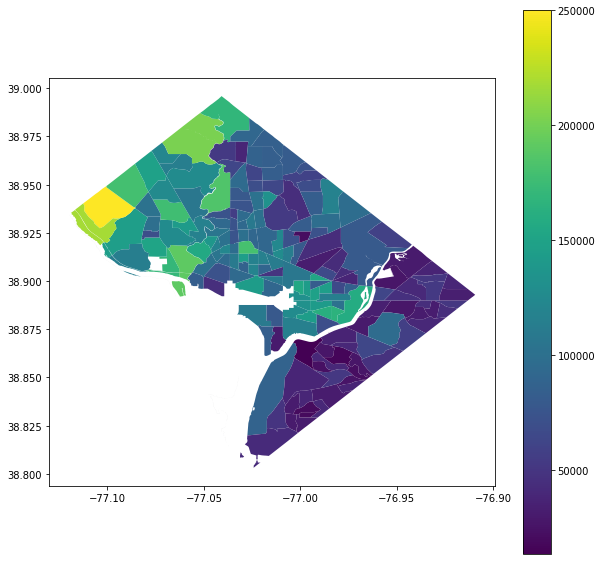

In [88]:
# Import shapefile:

shp = gpd.read_file('../data/spatial_data/ACS_2018_Median_Household_Income_Variables_Tract-shp/c9ca5f40-0f43-4de6-a527-28440f3bdf132020330-1-9idood.na0x.shp')
shp.plot(figsize=(10,10),
         column=df['B19049_001E'],
         legend=True)



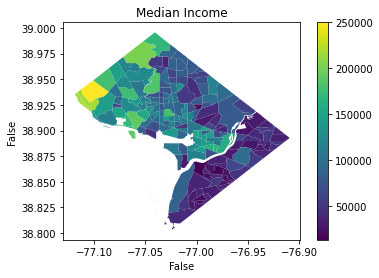

In [94]:
# Another way to plot using matplotlib:

fig, ax = plt.subplots()
#plt.figure(figsize=(3,4))

shp.plot(ax=ax,
         column=df['B19049_001E'],
         legend = True)

ax.figsize=(10,10)
ax.set_title('Median Income')
ax.set_xlabel(False)
ax.set_ylabel(False)

plt.show();

### To Do and Next Steps:

- Fetch 2018 ACS data on: 
        - Housing: done, in data folder
        - Social: done, in data folder
        - Economic: done, in data folder
        - Demographics: done, in data folder
- Get data dictionaries and map to variable names
- Merge all data on census tract (179 observations)
- Correlate all data on all variables. 
- Design some test and do some math to select varibles for clustering 
  (this will probably be the most time consuming aspect of the project)
- Select a clustering algorithm (all the math nerds are saying gaussian mixtures are the way to go?)
- Do the cluster thing.
- Interpret results: understand the clusters--BE THE CLUSTERS. What defines them?

200